In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraywavetrace import beam, optics, beamline2d

Can't find epics package. PPM_Imager class will not be supported


In [12]:
N = 512
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z_source': 650,
    'rangeFactor': 10
}

In [17]:
beam_params['photonEnergy'] = 9500

b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(10):
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6))

IP = optics.PPM('IP', FOV=4e-6, z=800.678, N=256)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800.02 + 1e-3, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803)


devices = [mr1l0,mr2l0, IP,upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused


FWHM in x: 291.38128781010033 microns
FWHM in y: 291.38128781010033 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
z intersect: 7.4000e+02
component z: 7.4000e+02
found curved mirror
[  0.   0. 740.]
delta z: 0.00
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: 1000000.00 microns
goal for zx: 90000000.00 microns
current zx: 89000000.00 microns
goal for zy: 90000000.00 microns
current zy: 89000000.00 microns
zx: 90.000000
zy: 90.000000
azimuth 0.00 mrad
mr1l0
ax: 0.000000e+00
ay: 0.000000e+00
zRx: 155596685.26 microns
zRy: 155596685.26 microns
remaining distance: -550000.00 microns
goal for zx: 89450000.00 microns
current zx: 90000000.00 microns
goal for zy: 89450000.00 microns
current zy: 90000000.00 microns
xhat: [ 0.99999118  0.         -0.00419999]
yhat: [0. 1. 0.]
zhat: [0.00419999 0

[<Axes: title={'center': 'IP'}, xlabel='X coordinates (microns)', ylabel='Y coordinates (microns)'>,
 <Axes: >,
 <Axes: >]

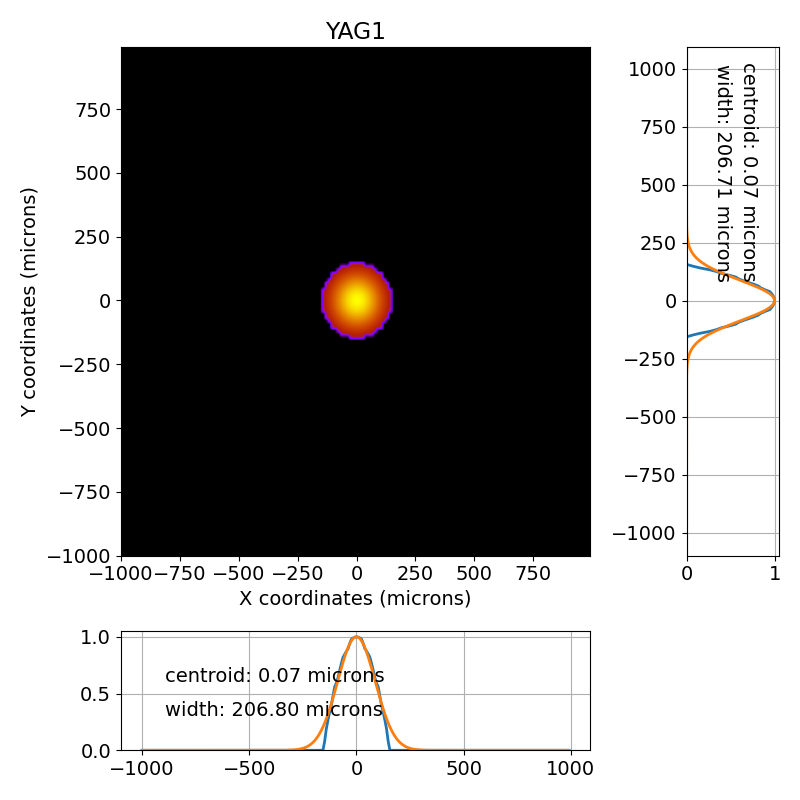

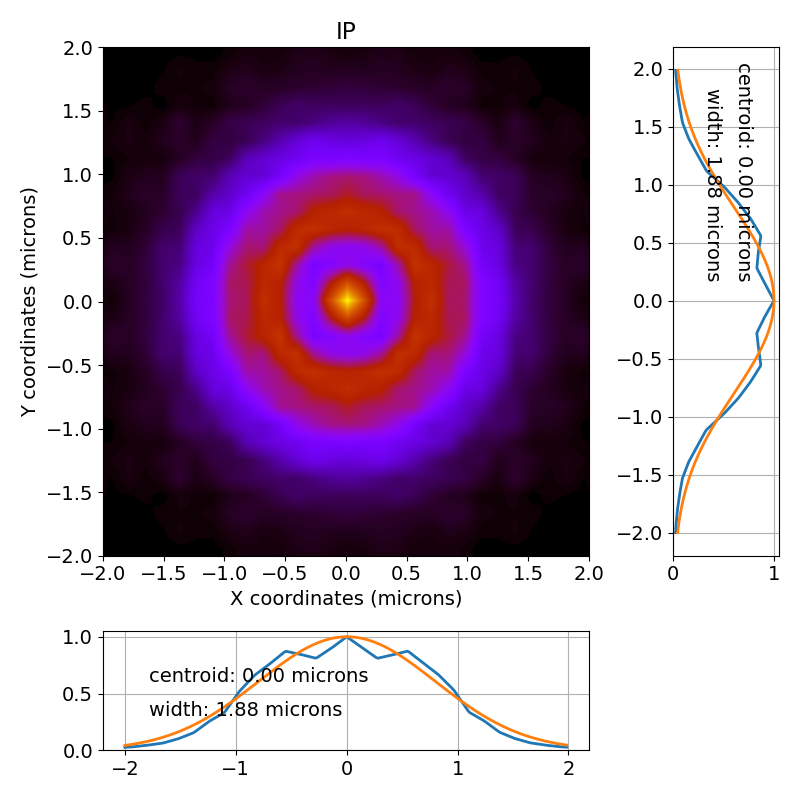

In [18]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()

In [7]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=.05, time_window=.5)

In [8]:
pulse_test.N

22

In [9]:
%%capture capt
pulse_test.propagate(beamline=XPP, screen_names=['IP','YAG1'])

Can't find epics package. PPM_Imager class will not be supported
FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
FWHM in x: 294.2512723188722 microns
FWHM in y: 294.2512723188722 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
z intersect: 7.4000e+02
component z: 7.4000e+02
found curved mirror
[  0.   0. 740.]
delta z: 0.00
zRx: 154073532.06 microns
zRy: 154073532.06 microns
remaining distance: 1000000.00 microns
goal for zx: 90000000.00 microns
current zx: 89000000.00 microns
goal for zy: 90000000.00 microns
current zy: 89000000.00 microns
zx: 90.000000
zy: 90.000000
azimuth 0.00 mrad
mr1l0
ax: 0.000000e+00
ay: 0.000000e+00
zRx: 154073532.06 microns
zRy: 154073532.06 microns
remaining distance: -550

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:501: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global)))


new z: 237.775037
new z y: 237.775826
-1.978910515113109e-12
2.110623929474598e-12
-1.978909647751371e-12
change in beam center
-1.0883998292142984e-12
is beam in the correct direction?
0.002099999997999819
nan
[0.0021    0.        0.9999978]
[[[0.00419999]]

 [[0.        ]]

 [[0.99999118]]]
[[[2.30999321e-03]]

 [[0.00000000e+00]]

 [[7.40549995e+02]]]
zRx: 3.67e+02
zRy: 3.62e+02
global_x: 0.00
global_y: 0.00
global_z: 740.55
(128, 128)
(128, 128)
zRx: 366875211.75 microns
zRy: 362434358.44 microns
remaining distance: -550000.00 microns
goal for zx: 237225037.10 microns
current zx: 237775037.10 microns
goal for zy: 237225826.27 microns
current zy: 237775826.27 microns
zx: 237.225037
zy: 237.225826
azimuth 4.20 mrad
drift2
global_x 0.00
global_y -0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 1.4217e-11
component y: 0.0000e+00
z intersect: 7.4729e+02
component z: 7.4729e+02
found curved mirror
[3.06013799e-02 1.42172984e-11 7.47286000e+02]
delta z: -0.01
zRx: 366875

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:788: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global[:, 0, 0])))


new z: 239.510451
new z y: 250.832431
2.152338905400535e-10
-2.0446077624716758e-10
2.17212660562399e-10
change in beam center
1.2055528682160947e-10
is beam in the correct direction?
0.006300000215216572
nan
[2.09999846e-03 2.11062393e-12 9.99997795e-01]
[[[8.39990122e-03]]

 [[2.11062393e-12]]

 [[9.99964720e-01]]]
[[[3.52213256e-02]]

 [[1.53781416e-11]]

 [[7.47835981e+02]]]
zRx: 3.71e+02
zRy: 4.00e+02
global_x: 0.04
global_y: 0.00
global_z: 747.84
(128, 128)
(128, 128)
zRx: 370577286.59 microns
zRy: 399718049.09 microns
remaining distance: -550000.00 microns
goal for zx: 238960451.01 microns
current zx: 239510451.01 microns
goal for zy: 250282431.22 microns
current zy: 250832431.22 microns
zx: 238.960451
zy: 250.282431
azimuth 8.40 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 4.7341e-01
component x: 4.7341e-01
y intersect: -1.0540e-08
component y: 0.0000e+00
z intersect: 8.0000e+02
component z: 8.0000e+02
delta z: 0.01
zRx: 370577286.59 microns
zRy: 399718049.09 microns
re

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:501: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global)))


new z: 237.401700
new z y: 237.403272
-1.818034805914482e-12
1.5469678939763696e-12
-1.818033938552744e-12
change in beam center
-9.999181891550533e-13
is beam in the correct direction?
0.002099999998158422
nan
[0.0021    0.        0.9999978]
[[[0.00419999]]

 [[0.        ]]

 [[0.99999118]]]
[[[2.30999321e-03]]

 [[0.00000000e+00]]

 [[7.40549995e+02]]]
zRx: 3.65e+02
zRy: 3.61e+02
global_x: 0.00
global_y: 0.00
global_z: 740.55
(128, 128)
(128, 128)
zRx: 365377532.90 microns
zRy: 360957192.26 microns
remaining distance: -550000.00 microns
goal for zx: 236851699.67 microns
current zx: 237401699.67 microns
goal for zy: 236853271.57 microns
current zy: 237403271.57 microns
zx: 236.851700
zy: 236.853272
azimuth 4.20 mrad
drift2
global_x 0.00
global_y -0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 1.0420e-11
component y: 0.0000e+00
z intersect: 7.4729e+02
component z: 7.4729e+02
found curved mirror
[3.06013799e-02 1.04204751e-11 7.47286000e+02]
delta z: -0.01
zRx: 365377

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:788: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global[:, 0, 0])))


new z: 239.160156
new z y: 250.435919
2.8232923934983063e-10
-2.0300343405855953e-10
2.8414714591828535e-10
change in beam center
1.5728077886770706e-10
is beam in the correct direction?
0.006300000282323827
0.0
[2.09999846e-03 1.54696789e-12 9.99997795e-01]
[[[8.39990122e-03]]

 [[1.54696789e-12]]

 [[9.99964720e-01]]]
[[[3.52213256e-02]]

 [[1.12713075e-11]]

 [[7.47835981e+02]]]
zRx: 3.69e+02
zRy: 3.98e+02
global_x: 0.04
global_y: 0.00
global_z: 747.84
(128, 128)
(128, 128)
zRx: 369141487.44 microns
zRy: 398072332.45 microns
remaining distance: -550000.00 microns
goal for zx: 238610155.52 microns
current zx: 239160155.52 microns
goal for zy: 249885918.52 microns
current zy: 250435918.52 microns
zx: 238.610156
zy: 249.885919
azimuth 8.40 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 4.7341e-01
component x: 4.7341e-01
y intersect: -1.0498e-08
component y: 0.0000e+00
z intersect: 8.0000e+02
component z: 8.0000e+02
delta z: 0.01
zRx: 369141487.44 microns
zRy: 398072332.45 microns

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:501: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global)))


new z: 237.031806
new z y: 237.032067
-9.814675722203971e-13
2.3789076697747807e-12
-9.814667048586592e-13
change in beam center
-5.398062106233067e-13
is beam in the correct direction?
0.002099999999004307
nan
[0.0021    0.        0.9999978]
[[[0.00419999]]

 [[0.        ]]

 [[0.99999118]]]
[[[2.30999321e-03]]

 [[0.00000000e+00]]

 [[7.40549995e+02]]]
zRx: 3.64e+02
zRy: 3.59e+02
global_x: 0.00
global_y: 0.00
global_z: 740.55
(128, 128)
(128, 128)
zRx: 363895062.40 microns
zRy: 359488687.57 microns
remaining distance: -550000.00 microns
goal for zx: 236481806.27 microns
current zx: 237031806.27 microns
goal for zy: 236482067.20 microns
current zy: 237032067.20 microns
zx: 236.481806
zy: 236.482067
azimuth 4.20 mrad
drift2
global_x 0.00
global_y -0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 1.6024e-11
component y: 0.0000e+00
z intersect: 7.4729e+02
component z: 7.4729e+02
found curved mirror
[3.06013799e-02 1.60244749e-11 7.47286000e+02]
delta z: -0.00
zRx: 363895

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:788: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global[:, 0, 0])))


new z: 238.813138
new z y: 250.039123
1.5514815463238109e-10
-2.0491497343852095e-10
1.5612955182671885e-10
change in beam center
8.641102196158114e-11
is beam in the correct direction?
0.006300000155140774
0.0
[2.09999846e-03 2.37890767e-12 9.99997795e-01]
[[[8.39990122e-03]]

 [[2.37890767e-12]]

 [[9.99964720e-01]]]
[[[3.52213256e-02]]

 [[1.73328742e-11]]

 [[7.47835981e+02]]]
zRx: 3.68e+02
zRy: 3.96e+02
global_x: 0.04
global_y: 0.00
global_z: 747.84
(128, 128)
(128, 128)
zRx: 367720105.77 microns
zRy: 396430857.92 microns
remaining distance: -550000.00 microns
goal for zx: 238263137.62 microns
current zx: 238813137.62 microns
goal for zy: 249489122.79 microns
current zy: 250039122.79 microns
zx: 238.263138
zy: 249.489123
azimuth 8.40 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 4.7341e-01
component x: 4.7341e-01
y intersect: -1.0548e-08
component y: 0.0000e+00
z intersect: 8.0000e+02
component z: 8.0000e+02
delta z: 0.00
zRx: 367720105.77 microns
zRy: 396430857.92 microns


/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:501: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global)))


new z: 236.661946
new z y: 236.662205
-1.546957336737107e-12
1.9610855247068654e-12
-1.546956469375369e-12
change in beam center
-8.508255811074971e-13
is beam in the correct direction?
0.0020999999984227615
nan
[0.0021    0.        0.9999978]
[[[0.00419999]]

 [[0.        ]]

 [[0.99999118]]]
[[[2.30999321e-03]]

 [[0.00000000e+00]]

 [[7.40549995e+02]]]
zRx: 3.62e+02
zRy: 3.58e+02
global_x: 0.00
global_y: 0.00
global_z: 740.55
(128, 128)
(128, 128)
zRx: 362417259.61 microns
zRy: 358028777.39 microns
remaining distance: -550000.00 microns
goal for zx: 236111945.59 microns
current zx: 236661945.59 microns
goal for zy: 236112205.45 microns
current zy: 236662205.45 microns
zx: 236.111946
zy: 236.112205
azimuth 4.20 mrad
drift2
global_x 0.00
global_y -0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 1.3210e-11
component y: 0.0000e+00
z intersect: 7.4729e+02
component z: 7.4729e+02
found curved mirror
[3.06013799e-02 1.32099981e-11 7.47286000e+02]
delta z: -0.00
zRx: 36241

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:788: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global[:, 0, 0])))


new z: 238.465956
new z y: 249.646355
1.609151287834444e-10
-2.0299070153395328e-10
1.624619770403642e-10
change in beam center
9.02048539135062e-11
is beam in the correct direction?
0.006300000160885776
0.0
[2.09999846e-03 1.96108552e-12 9.99997795e-01]
[[[8.39990122e-03]]

 [[1.96108552e-12]]

 [[9.99964720e-01]]]
[[[3.52213256e-02]]

 [[1.42885947e-11]]

 [[7.47835981e+02]]]
zRx: 3.66e+02
zRy: 3.95e+02
global_x: 0.04
global_y: 0.00
global_z: 747.84
(128, 128)
(128, 128)
zRx: 366302460.76 microns
zRy: 394807254.11 microns
remaining distance: -550000.00 microns
goal for zx: 237915955.91 microns
current zx: 238465955.91 microns
goal for zy: 249096355.37 microns
current zy: 249646355.37 microns
zx: 237.915956
zy: 249.096355
azimuth 8.40 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 4.7341e-01
component x: 4.7341e-01
y intersect: -1.0473e-08
component y: 0.0000e+00
z intersect: 8.0000e+02
component z: 8.0000e+02
delta z: 0.00
zRx: 366302460.76 microns
zRy: 394807254.11 microns
rem

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:501: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global)))


new z: 236.295232
new z y: 236.297043
-9.26771865209599e-13
1.2368619573347227e-12
-9.267709978478611e-13
change in beam center
-5.097235717673677e-13
is beam in the correct direction?
0.002099999999057175
nan
[0.0021    0.        0.9999978]
[[[0.00419999]]

 [[0.        ]]

 [[0.99999118]]]
[[[2.30999321e-03]]

 [[0.00000000e+00]]

 [[7.40549995e+02]]]
zRx: 3.61e+02
zRy: 3.57e+02
global_x: 0.00
global_y: 0.00
global_z: 740.55
(128, 128)
(128, 128)
zRx: 360953624.30 microns
zRy: 356587549.95 microns
remaining distance: -550000.00 microns
goal for zx: 235745231.57 microns
current zx: 236295231.57 microns
goal for zy: 235747043.26 microns
current zy: 236297043.26 microns
zx: 235.745232
zy: 235.747043
azimuth 4.20 mrad
drift2
global_x 0.00
global_y -0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 8.3316e-12
component y: 0.0000e+00
z intersect: 7.4729e+02
component z: 7.4729e+02
found curved mirror
[3.06013799e-02 8.33158163e-12 7.47286000e+02]
delta z: -0.00
zRx: 3609536

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:788: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.dot(beam.zhat, k_f_global[:, 0, 0])))


new z: 238.121492
new z y: 249.257260
2.3324680524026234e-10
-2.0104468122252903e-10
2.3417350994866274e-10
change in beam center
1.2930511806138474e-10
is beam in the correct direction?
0.006300000233226975
0.0
[2.09999846e-03 1.23686196e-12 9.99997795e-01]
[[[8.39990122e-03]]

 [[1.23686196e-12]]

 [[9.99964720e-01]]]
[[[3.52213256e-02]]

 [[9.01185570e-12]]

 [[7.47835981e+02]]]
zRx: 3.65e+02
zRy: 3.93e+02
global_x: 0.04
global_y: 0.00
global_z: 747.84
(128, 128)
(128, 128)
zRx: 364897397.53 microns
zRy: 393200334.10 microns
remaining distance: -550000.00 microns
goal for zx: 237571492.24 microns
current zx: 238121492.24 microns
goal for zy: 248707259.72 microns
current zy: 249257259.72 microns
zx: 237.571492
zy: 248.707260
azimuth 8.40 mrad
drift3
global_x 0.03
global_y 0.00
x intersect: 4.7341e-01
component x: 4.7341e-01
y intersect: -1.0414e-08
component y: 0.0000e+00
z intersect: 8.0000e+02
component z: 8.0000e+02
delta z: 0.00
zRx: 364897397.53 microns
zRy: 393200334.10 microns

crl2
focal length: 6.52
drift5
zRx: 25886.97 microns
zRy: 25886.97 microns
remaining distance: 1000.00 microns
goal for zx: -2199977.07 microns
current zx: -2200977.07 microns
goal for zy: -2199977.07 microns
current zy: -2200977.07 microns
crl3
focal length: 6.52
drift6
zRx: 14472.72 microns
zRy: 14472.72 microns
remaining distance: 1000.00 microns
goal for zx: -1643949.42 microns
current zx: -1644949.42 microns
goal for zy: -1643949.42 microns
current zy: -1644949.42 microns
crl4
focal length: 6.52
drift7
zRx: 9230.99 microns
zRy: 9230.99 microns
remaining distance: 1000.00 microns
goal for zx: -1311917.54 microns
current zx: -1312917.54 microns
goal for zy: -1311917.54 microns
current zy: -1312917.54 microns
crl5
focal length: 6.52
drift8
zRx: 6397.49 microns
zRy: 6397.49 microns
remaining distance: 1000.00 microns
goal for zx: -1091162.97 microns
current zx: -1092162.97 microns
goal for zy: -1091162.97 microns
current zy: -1092162.97 microns
crl6
focal length: 6.52
drift9
zRx: 4694

crl7
focal length: 6.54
drift10
zRx: 3624.53 microns
zRy: 3624.53 microns
remaining distance: 1000.00 microns
goal for zx: -818684.01 microns
current zx: -819684.01 microns
goal for zy: -818684.01 microns
current zy: -819684.01 microns
crl8
focal length: 6.54
drift11
zRx: 2863.22 microns
zRy: 2863.22 microns
remaining distance: 1000.00 microns
goal for zx: -726642.25 microns
current zx: -727642.25 microns
goal for zy: -726642.25 microns
current zy: -727642.25 microns
crl9
focal length: 6.54
drift12
zRx: 2319.46 microns
zRy: 2319.46 microns
remaining distance: 12000.00 microns
goal for zx: -642012.72 microns
current zx: -654012.72 microns
goal for zy: -642012.72 microns
current zy: -654012.72 microns
YAG1
drift13
zRx: 2319.46 microns
zRy: 2319.46 microns
remaining distance: 650000.00 microns
goal for zx: 7987.28 microns
current zx: -642012.72 microns
goal for zy: 7987.28 microns
current zy: -642012.72 microns
IP
FWHM in x: 361.7551170592888 microns
FWHM in y: 361.7551170592888 microns
F

mr2l0
drift2
zRx: 155088967.52 microns
zRy: 155088967.52 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 155088967.52 microns
zRy: 155088967.52 microns
remaining distance: 14911032.48 microns
goal for zx: 170000000.00 microns
current zx: 155088967.52 microns
goal for zy: 170000000.00 microns
current zy: 155088967.52 microns
crl0
focal length: 6.58
drift3
zRx: 251180.10 microns
zRy: 251180.10 microns
remaining distance: 1000.00 microns
goal for zx: -6842041.52 microns
current zx: -6843041.52 microns
goal for zy: -6842041.52 microns
current zy: -6843041.52 microns
crl1
focal length: 6.58
drift4
zRx: 60350.63 microns
zRy: 60350.63 microns
remaining distance: 1000.00 microns
goal for zx: -3352775.60 microns
current zx: -3353775.60 microns
goal for zy: -3352775.60 microns
current zy: -3353775.60 microns
crl2
focal 

crl3
focal length: 6.60
drift6
zRx: 14938.11 microns
zRy: 14938.11 microns
remaining distance: 1000.00 microns
goal for zx: -1664763.64 microns
current zx: -1665763.64 microns
goal for zy: -1664763.64 microns
current zy: -1665763.64 microns
crl4
focal length: 6.60
drift7
zRx: 9527.30 microns
zRy: 9527.30 microns
remaining distance: 1000.00 microns
goal for zx: -1328504.25 microns
current zx: -1329504.25 microns
goal for zy: -1328504.25 microns
current zy: -1329504.25 microns
crl5
focal length: 6.60
drift8
zRx: 6602.60 microns
zRy: 6602.60 microns
remaining distance: 1000.00 microns
goal for zx: -1104949.49 microns
current zx: -1105949.49 microns
goal for zy: -1104949.49 microns
current zy: -1105949.49 microns
crl6
focal length: 6.60
drift9
zRx: 4845.03 microns
zRy: 4845.03 microns
remaining distance: 1000.00 microns
goal for zx: -945527.87 microns
current zx: -946527.87 microns
goal for zy: -945527.87 microns
current zy: -946527.87 microns
crl7
focal length: 6.60
drift10
zRx: 3707.10 m

crl6
focal length: 6.63
drift9
zRx: 4889.11 microns
zRy: 4889.11 microns
remaining distance: 1000.00 microns
goal for zx: -948952.70 microns
current zx: -949952.70 microns
goal for zy: -948952.70 microns
current zy: -949952.70 microns
crl7
focal length: 6.63
drift10
zRx: 3740.80 microns
zRy: 3740.80 microns
remaining distance: 1000.00 microns
goal for zx: -829064.62 microns
current zx: -830064.62 microns
goal for zy: -829064.62 microns
current zy: -830064.62 microns
crl8
focal length: 6.63
drift11
zRx: 2955.00 microns
zRy: 2955.00 microns
remaining distance: 1000.00 microns
goal for zx: -735859.53 microns
current zx: -736859.53 microns
goal for zy: -735859.53 microns
current zy: -736859.53 microns
crl9
focal length: 6.63
drift12
zRx: 2393.75 microns
zRy: 2393.75 microns
remaining distance: 12000.00 microns
goal for zx: -650301.13 microns
current zx: -662301.13 microns
goal for zy: -650301.13 microns
current zy: -662301.13 microns
YAG1
drift13
zRx: 2393.75 microns
zRy: 2393.75 microns
r

YAG1
drift13
zRx: 2415.35 microns
zRy: 2415.35 microns
remaining distance: 650000.00 microns
goal for zx: -2682.70 microns
current zx: -652682.70 microns
goal for zy: -2682.70 microns
current zy: -652682.70 microns
IP
FWHM in x: 358.7368962189446 microns
FWHM in y: 358.7368962189446 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 156104402.99 microns
zRy: 156104402.99 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 156104402.99 microns
zRy: 156104402.99 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 156104402.99 microns
zRy: 156104402.99 microns
remaining distance: 13895597.01 microns
goal for zx: 

crl1
focal length: 6.68
drift4
zRx: 62882.96 microns
zRy: 62882.96 microns
remaining distance: 1000.00 microns
goal for zx: -3408173.70 microns
current zx: -3409173.70 microns
goal for zy: -3408173.70 microns
current zy: -3409173.70 microns
crl2
focal length: 6.68
drift5
zRx: 27584.80 microns
zRy: 27584.80 microns
remaining distance: 1000.00 microns
goal for zx: -2256304.61 microns
current zx: -2257304.61 microns
goal for zy: -2256304.61 microns
current zy: -2257304.61 microns
crl3
focal length: 6.68
drift6
zRx: 15419.25 microns
zRy: 15419.25 microns
remaining distance: 1000.00 microns
goal for zx: -1685919.48 microns
current zx: -1686919.48 microns
goal for zy: -1685919.48 microns
current zy: -1686919.48 microns
crl4
focal length: 6.68
drift7
zRx: 9833.62 microns
zRy: 9833.62 microns
remaining distance: 1000.00 microns
goal for zx: -1345362.36 microns
current zx: -1346362.36 microns
goal for zy: -1345362.36 microns
current zy: -1346362.36 microns
crl5
focal length: 6.68
drift8
zRx: 68

crl6
focal length: 6.71
drift9
zRx: 5045.84 microns
zRy: 5045.84 microns
remaining distance: 1000.00 microns
goal for zx: -960979.07 microns
current zx: -961979.07 microns
goal for zy: -960979.07 microns
current zy: -961979.07 microns
crl7
focal length: 6.71
drift10
zRx: 3860.61 microns
zRy: 3860.61 microns
remaining distance: 1000.00 microns
goal for zx: -839572.92 microns
current zx: -840572.92 microns
goal for zy: -839572.92 microns
current zy: -840572.92 microns
crl8
focal length: 6.71
drift11
zRx: 3049.57 microns
zRy: 3049.57 microns
remaining distance: 1000.00 microns
goal for zx: -745190.05 microns
current zx: -746190.05 microns
goal for zy: -745190.05 microns
current zy: -746190.05 microns
crl9
focal length: 6.71
drift12
zRx: 2470.30 microns
zRy: 2470.30 microns
remaining distance: 12000.00 microns
goal for zx: -658691.29 microns
current zx: -670691.29 microns
goal for zy: -658691.29 microns
current zy: -670691.29 microns
YAG1
drift13
zRx: 2470.30 microns
zRy: 2470.30 microns
r

mr1l0
drift1
zRx: 157119838.46 microns
zRy: 157119838.46 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 157119838.46 microns
zRy: 157119838.46 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
x becomes unfocused
y becomes unfocused
zRx: 157119838.46 microns
zRy: 157119838.46 microns
remaining distance: 12880161.54 microns
goal for zx: 170000000.00 microns
current zx: 157119838.46 microns
goal for zy: 170000000.00 microns
current zy: 157119838.46 microns
crl0
focal length: 6.75
drift3
zRx: 268065.44 microns
zRy: 268065.44 microns
remaining distance: 1000.00 microns
goal for zx: -7022695.37 microns
current zx: -7023695.37 microns
goal for zy: -7022695.37 microns
current zy: -7023695.37 microns
crl1
focal len

<IPython.core.display.Javascript object>


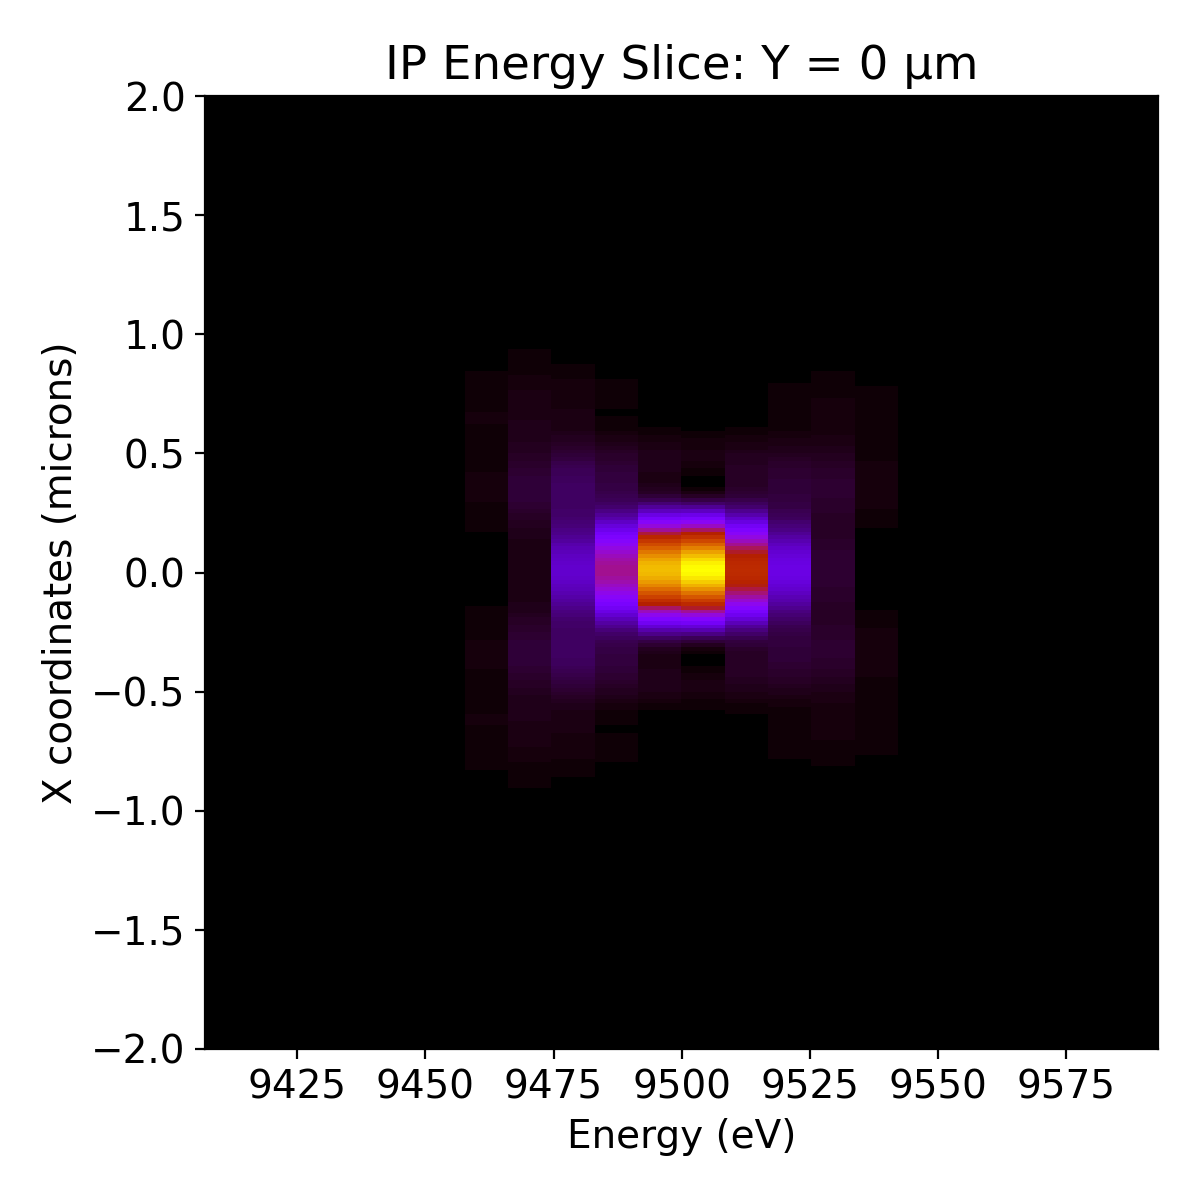

<IPython.core.display.Javascript object>


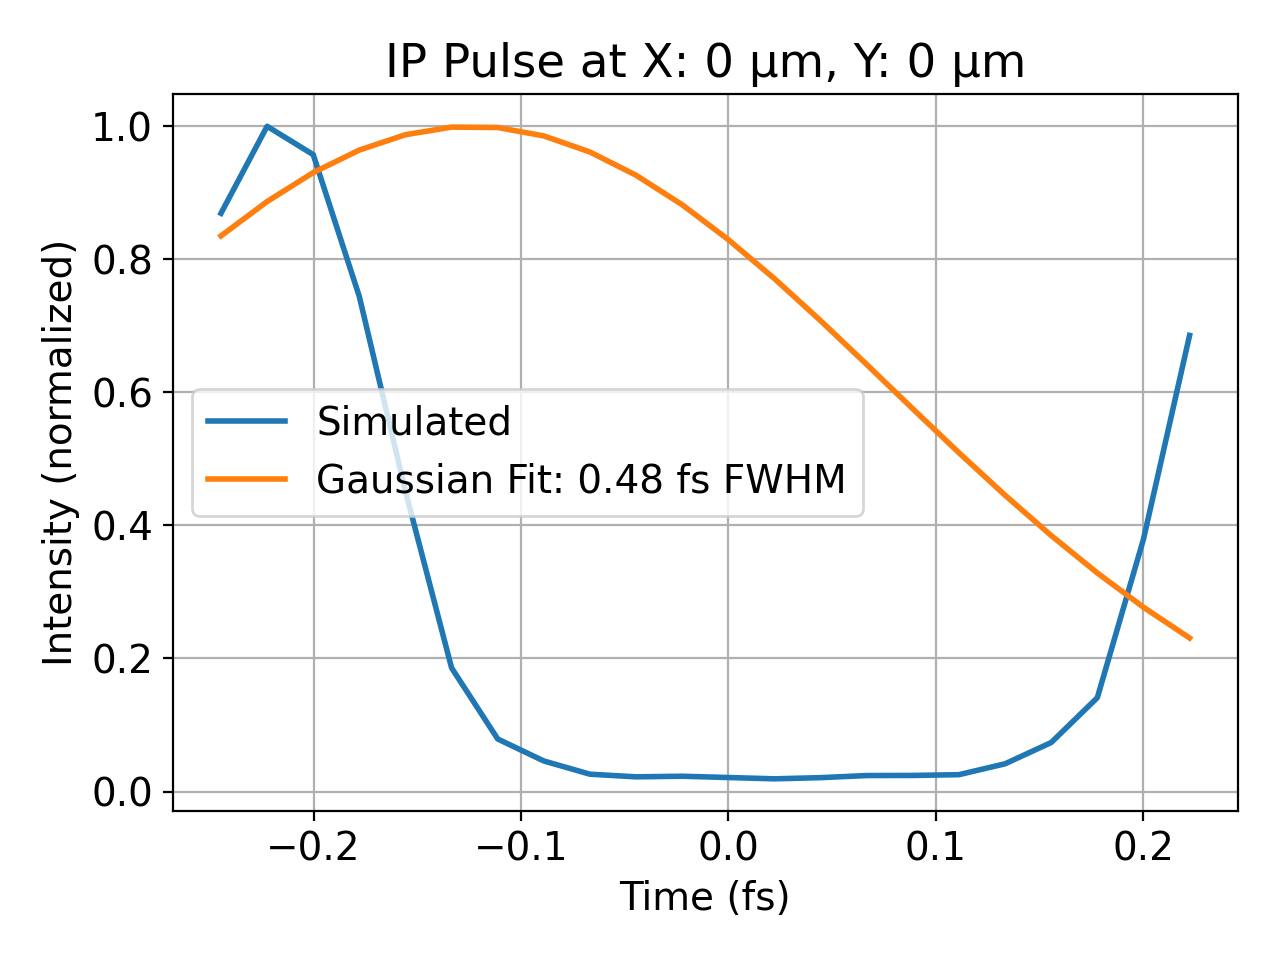

<IPython.core.display.Javascript object>


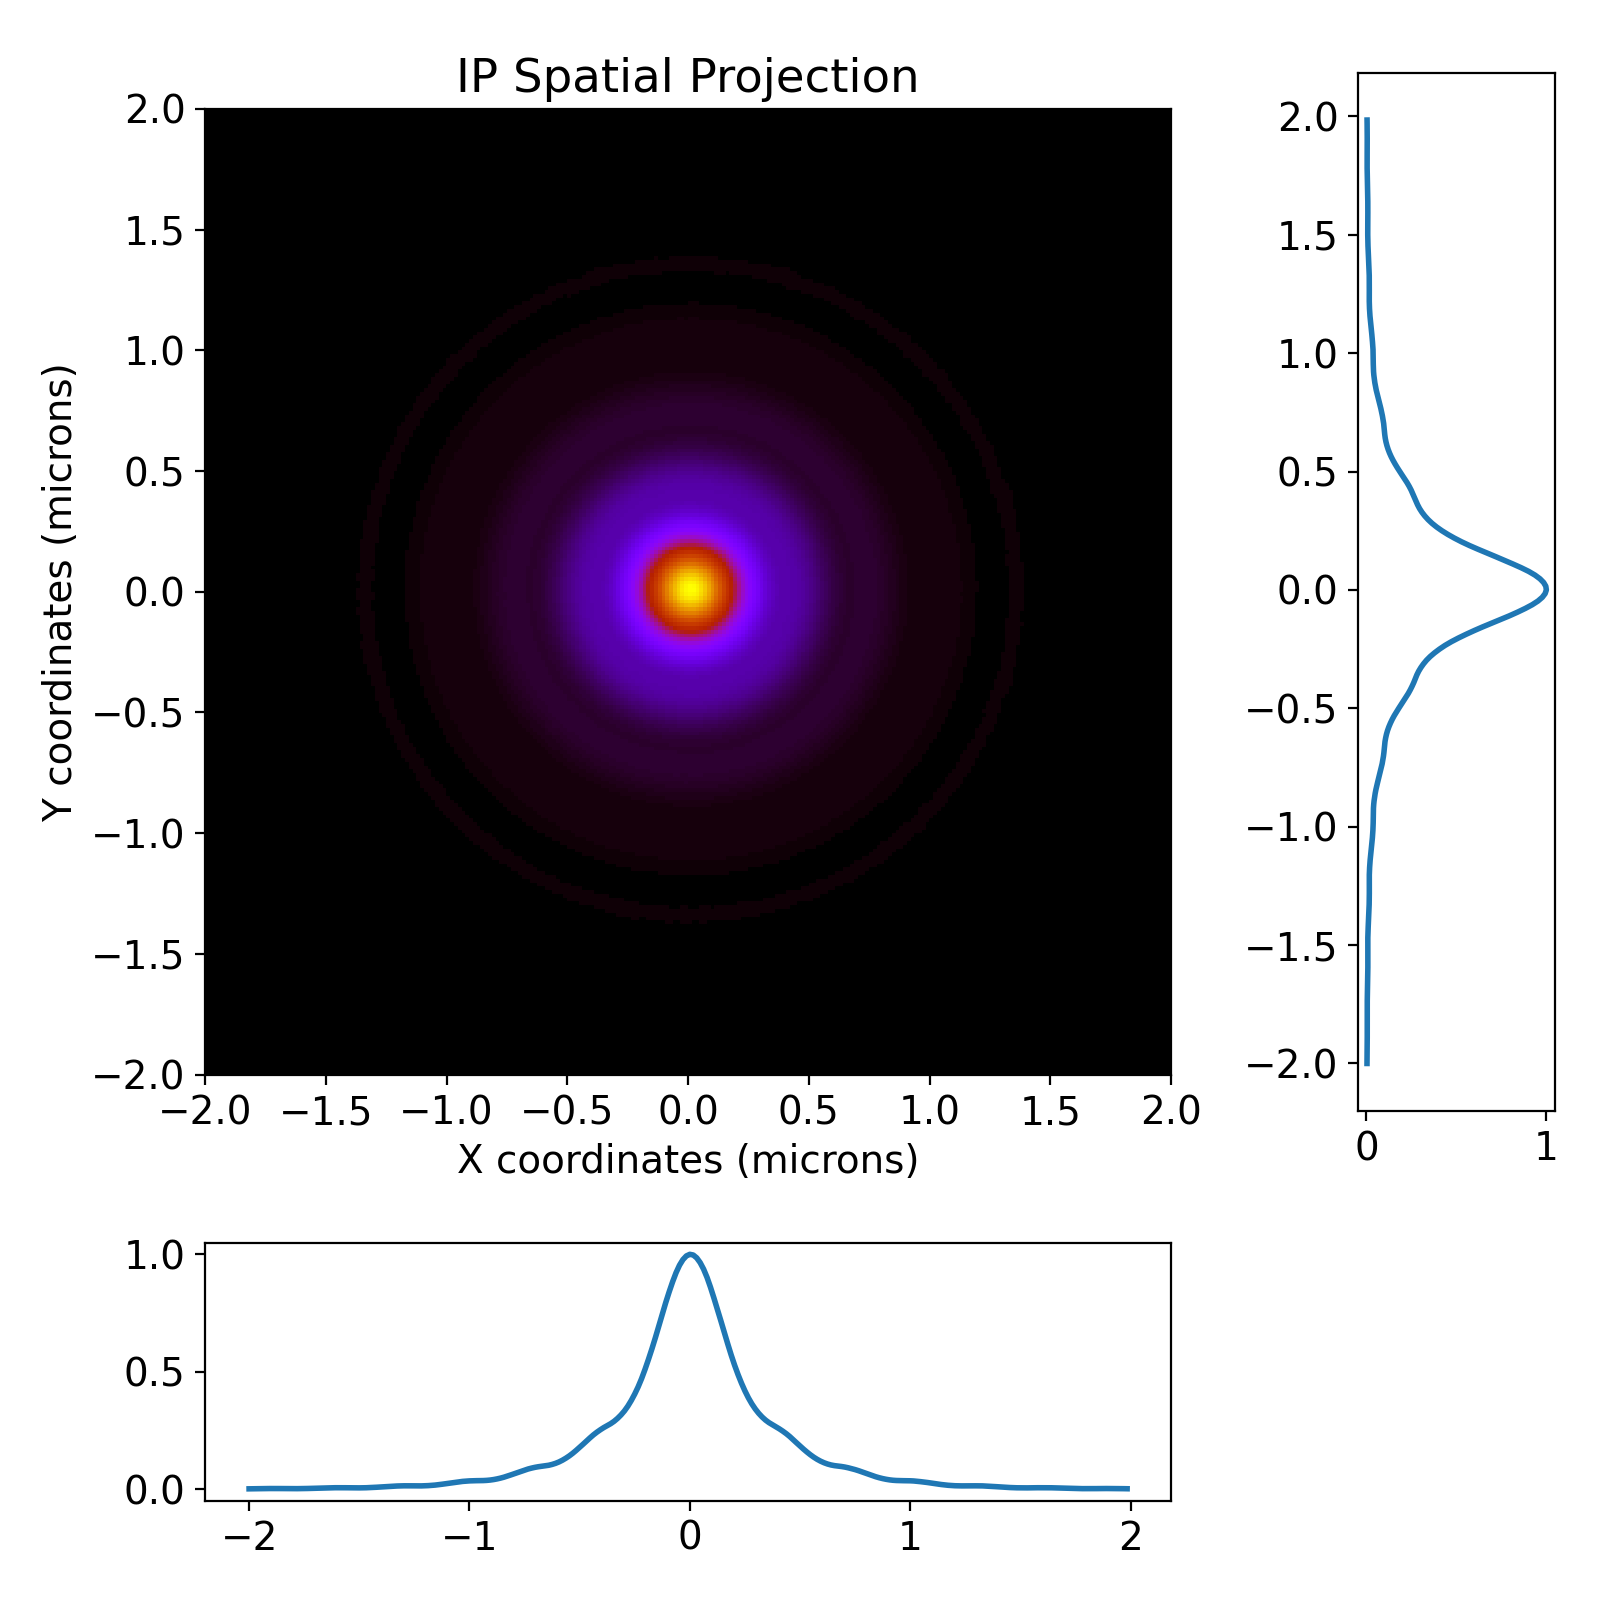

<IPython.core.display.Javascript object>


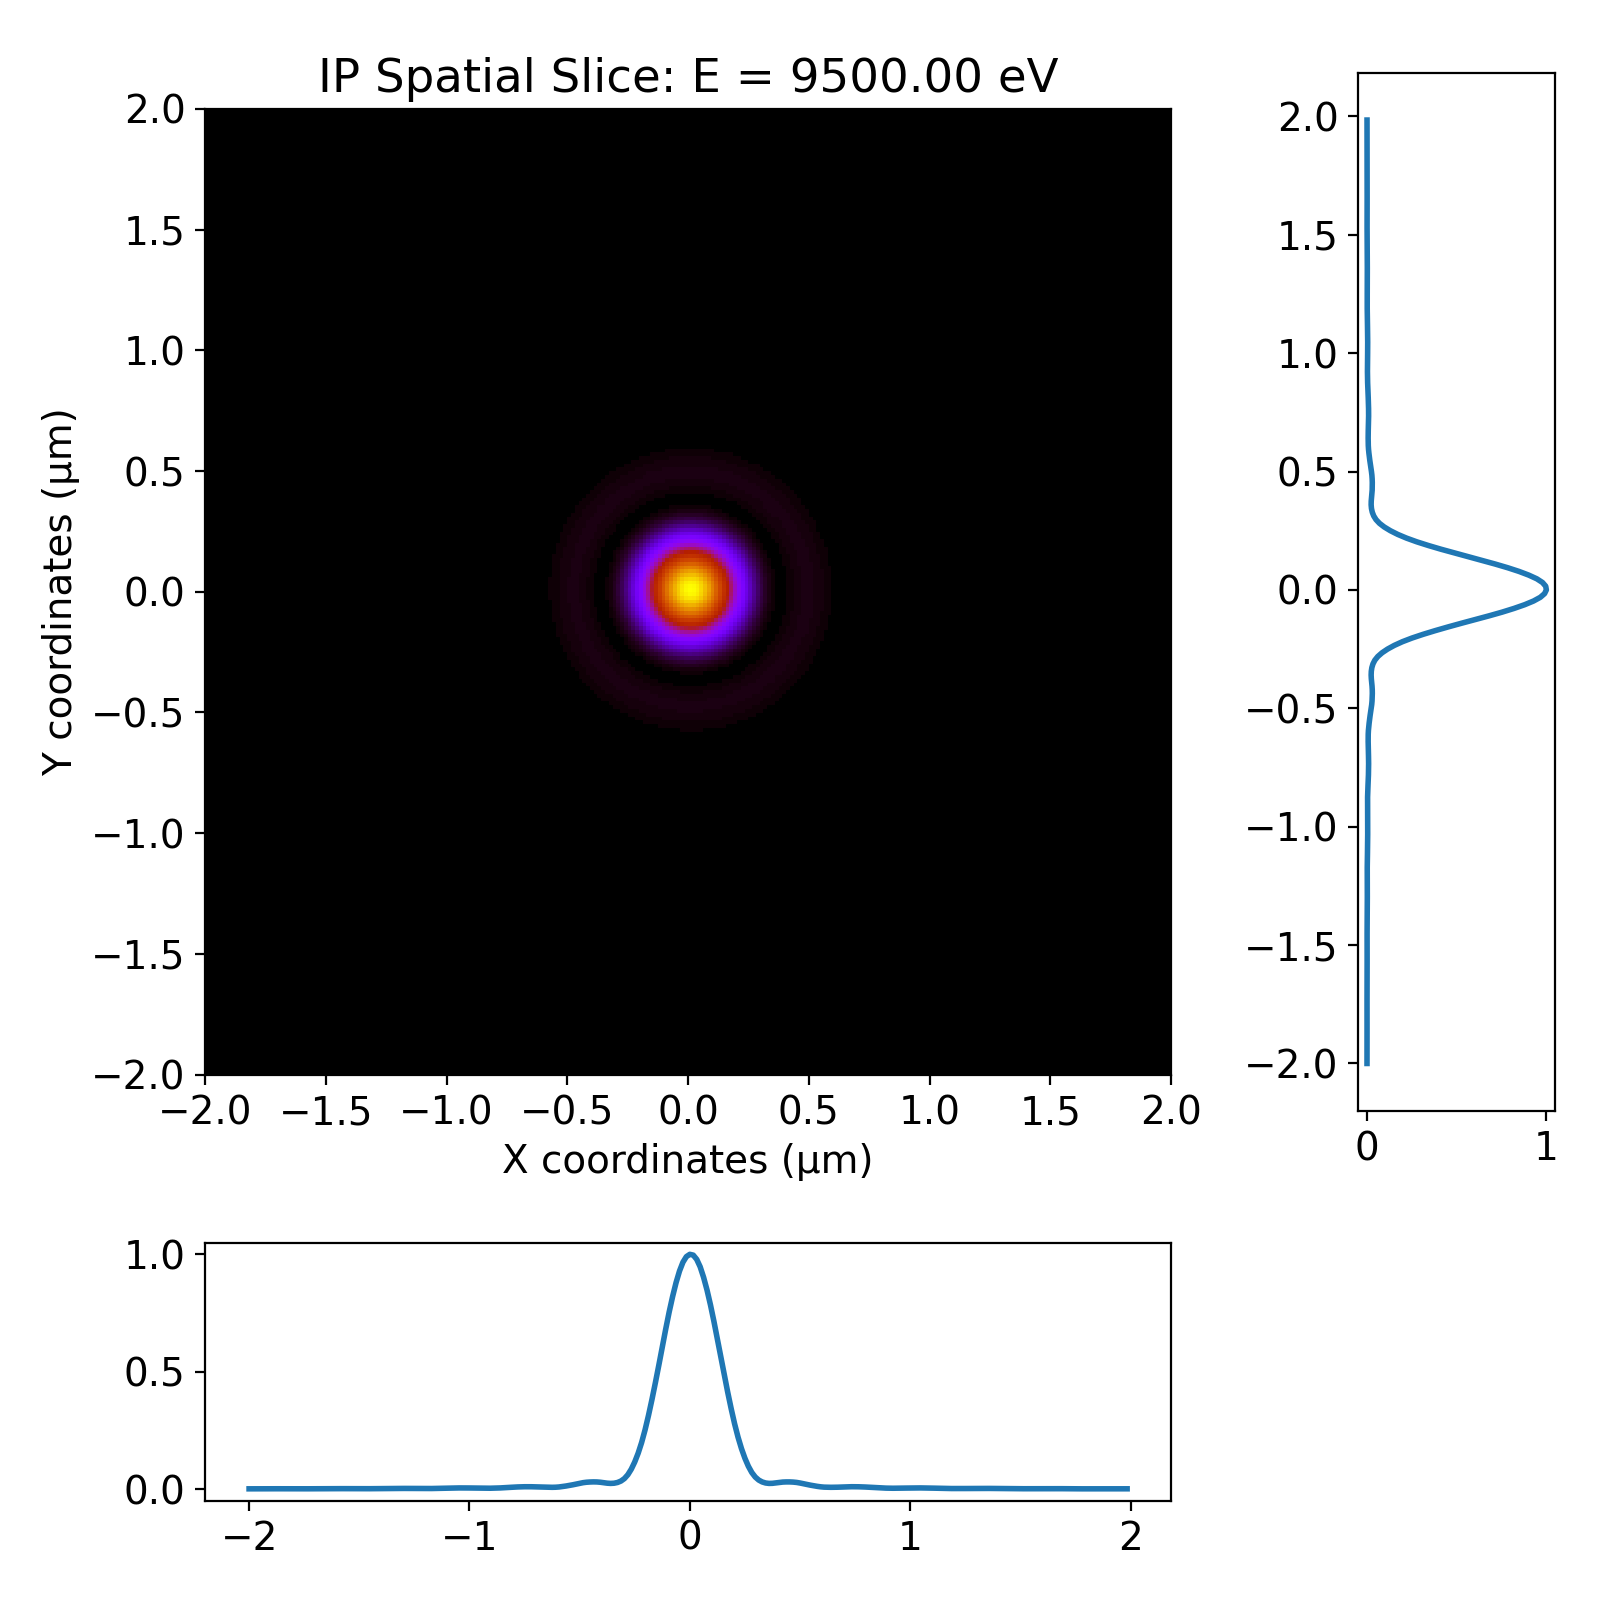

<IPython.core.display.Javascript object>


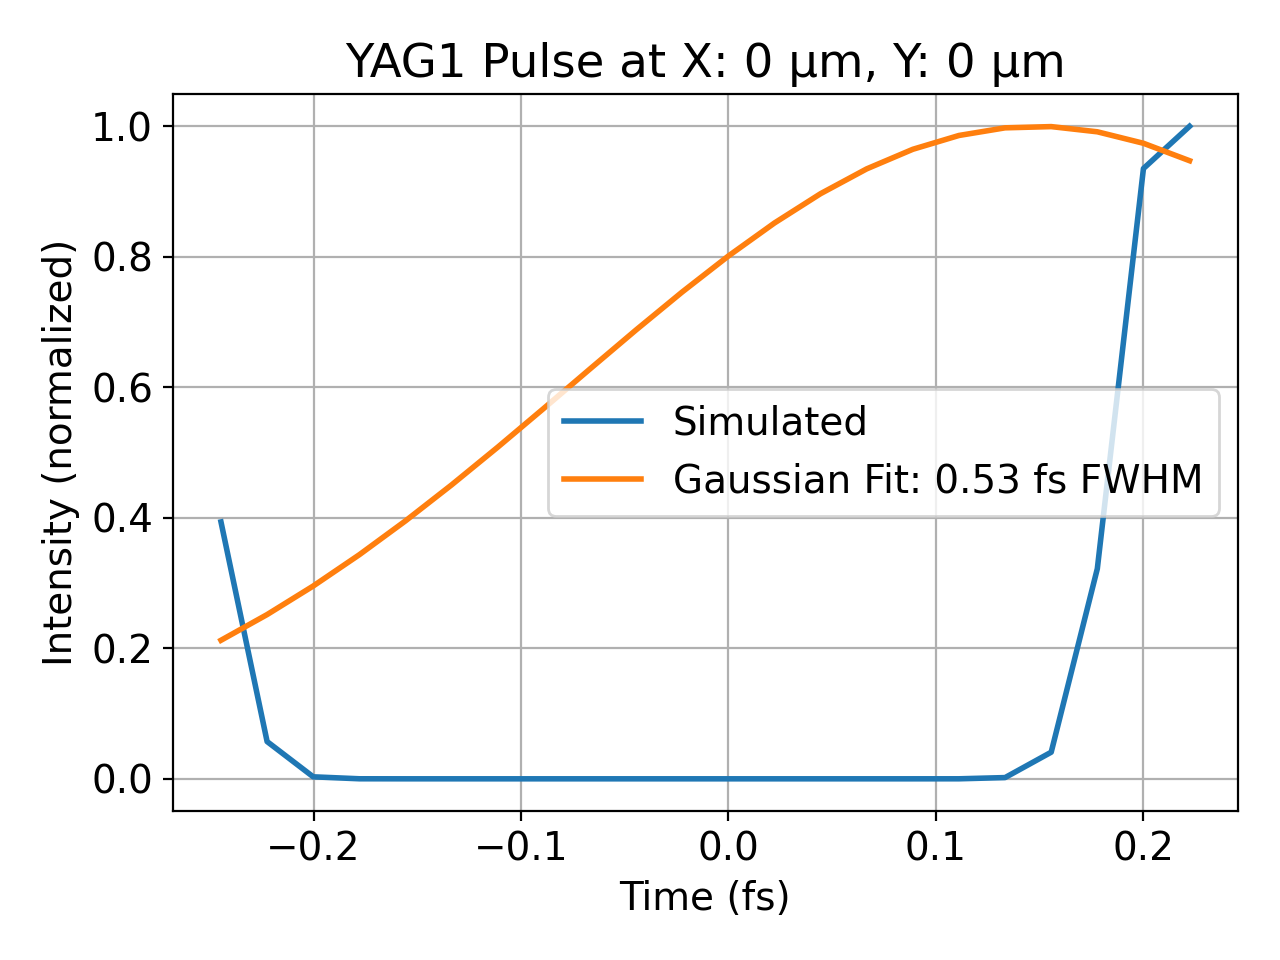

<IPython.core.display.Javascript object>


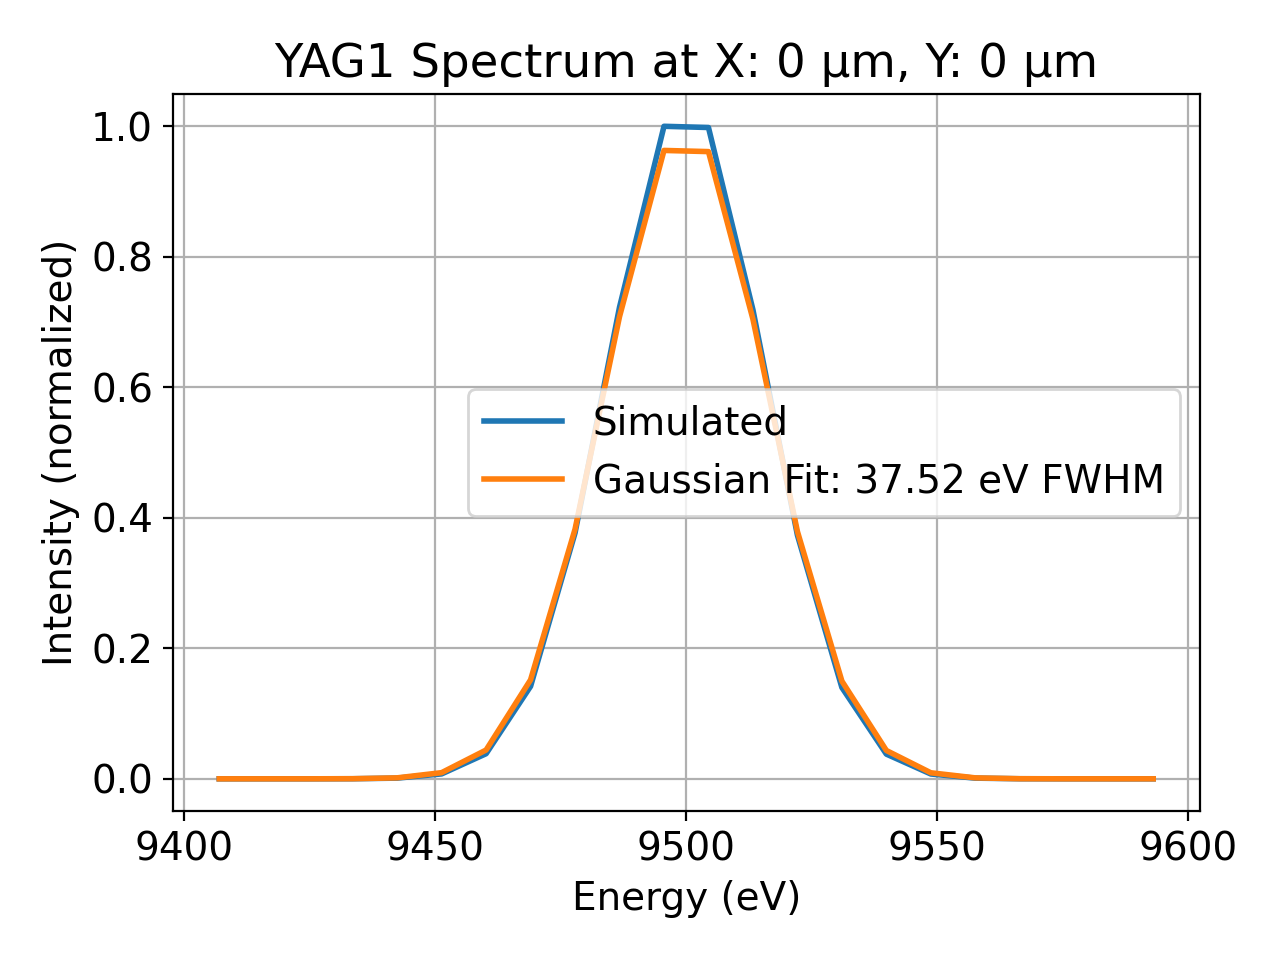

In [14]:
figure_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Commissioning/SXR beam delivery/time_domain_figures/'

pulse_test.imshow_energy_slice('IP')
plt.savefig(figure_path+'CRL_energy_slice.png')
pulse_test.plot_pulse('IP')
pulse_test.imshow_projection('IP')
plt.savefig(figure_path+'CRL_integrated.png')
pulse_test.imshow_spatial_slice('IP',slice_pos=9500)
plt.savefig(figure_path+'CRL_spatial_slice.png')
pulse_test.plot_pulse('YAG1')
pulse_test.plot_spectrum('YAG1')
plt.savefig(figure_path+'CRL_spectrum.png')